In [ ]:
import torch
import numpy as np
import time

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 250
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
train_transform = transforms.Compose([transforms.RandomCrop(32,padding=4),
                                transforms.RandomHorizontalFlip(),transforms.ToTensor(),
                                transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,.225])])

test_transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,.225])])
# choose the training and test datasets
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=train_transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=test_transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 32, 32)
(3, 32, 32)
(3, 32, 32)
(3, 32, 32)


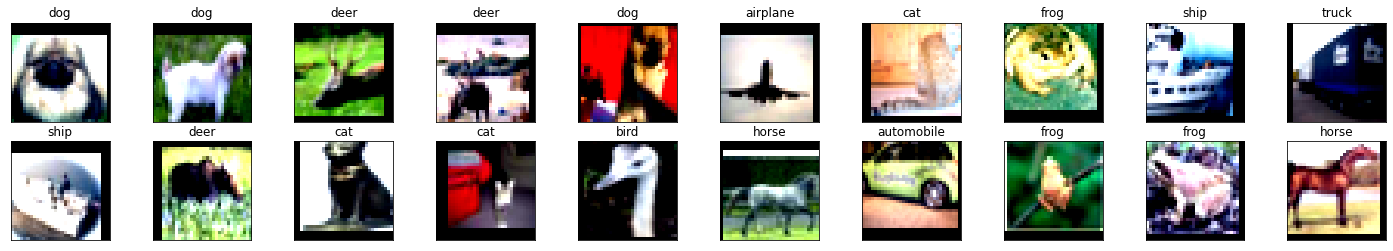

In [ ]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    print(images[idx].shape)
    ax.set_title(classes[labels[idx]])

In [ ]:
import math
import torch
import torch.nn as nn
from torch.optim import Optimizer

In [ ]:
class BasicBlock(nn.Module):
    def __init__(self,in_channels,out_channels,identity_downsample=None,stride=1):
      super(BasicBlock,self).__init__()
      self.conv1= nn.Conv2d(in_channels,out_channels,kernel_size=3,stride=stride,padding=1)
      self.bn1= nn.BatchNorm2d(out_channels)
      self.conv2= nn.Conv2d(out_channels,out_channels,kernel_size=3,stride=1,padding=1)
      self.bn2= nn.BatchNorm2d(out_channels)
      self.relu= nn.ReLU()
      self.identity_downsample= identity_downsample
    
    def forward(self,x):
      identity=x
      x = self.conv1(x)
      x = self.bn1(x)
      x = self.relu(x)
      x = self.conv2(x)
      x = self.bn2(x)
      x = self.relu(x)
      if self.identity_downsample is not None:
        identity = self.identity_downsample(identity)
      
      x += identity
      x = self.relu(x)
      return x

In [ ]:
class ResNet(nn.Module):
    def __init__(self,block,layers,image_channels,num_classes):
      super(ResNet,self).__init__()
      self.in_channels = 16
      self.conv1 = nn.Conv2d(image_channels,16,kernel_size= 3,stride=1,padding=1)
      self.bn1 = nn.BatchNorm2d(16)
      self.relu = nn.ReLU()
      self.layer1 = self._make_layer(block,5,out_channels=16,stride=1)
      self.layer2 = self._make_layer(block,5,out_channels=32,stride=2)
      self.layer3 = self._make_layer(block,5,out_channels=64,stride=2)
      self.avgpool = nn.AdaptiveAvgPool2d(1)
      self.fc = nn.Linear(64,num_classes)
      self.softmax = nn.Softmax(dim=1)
  
    def forward(self,x):
      x = self.conv1(x)
      x = self.bn1(x)
      x = self.relu(x)
      x = self.layer1(x)
      x = self.layer2(x)
      x = self.layer3(x)
      x = self.avgpool(x)
      x = x.reshape(x.shape[0],-1)
      x = self.fc(x)
      x = self.softmax(x)
      return x

      # ResNet layers
    
    def _make_layer(self,block,num_residual_blocks,out_channels,stride):
      identity_downsample= None
      layers = []
      if stride!=1 or self.in_channels!= out_channels:
        identity_downsample = nn.Sequential(nn.Conv2d(self.in_channels,out_channels,kernel_size=1,stride=stride),
                                            nn.BatchNorm2d(out_channels))
      layers.append(block(self.in_channels,out_channels,identity_downsample,stride))
      self.in_channels = out_channels
      
      for i in range(num_residual_blocks - 1):
          layers.append(block(self.in_channels,out_channels))
      
      return nn.Sequential(*layers)



In [ ]:
def ResNet32(img_channels=3,num_classes = 10):
    return ResNet(BasicBlock, [5,5,5,5], img_channels,num_classes)

In [ ]:
from torchsummary import summary

model = ResNet32(3, 10)
summary(model.cuda(), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           2,320
       BatchNorm2d-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
            Conv2d-7           [-1, 16, 32, 32]           2,320
       BatchNorm2d-8           [-1, 16, 32, 32]              32
              ReLU-9           [-1, 16, 32, 32]               0
             ReLU-10           [-1, 16, 32, 32]               0
       BasicBlock-11           [-1, 16, 32, 32]               0
           Conv2d-12           [-1, 16, 32, 32]           2,320
      BatchNorm2d-13           [-1, 16, 32, 32]              32
             ReLU-14           [-1, 16,

In [ ]:
import math
import torch
from torch.optim import Optimizer

In [ ]:
class STORM(Optimizer):
    r"""Implements STORM algorithm.

    It has been proposed in `STORM: A Method for Stochastic Optimization`_.

    Arguments:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        k (float, optional): learning rate (default: 1e-3)
        betas (Tuple[float, float], optional): coefficients used for computing
            running averages of gradient and its square (default: (0.9, 0.999))
        eps (float, optional): term added to the denominator to improve
            numerical stability (default: 1e-8)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        amsgrad (boolean, optional): whether to use the AMSGrad variant of this
            algorithm from the paper `On the Convergence of Adam and Beyond`_
            (default: False)

    .. _Adam\: A Method for Stochastic Optimization:
        https://arxiv.org/abs/1412.6980
    """

    def __init__(self, params, k=0.1, w=0.1, c=1, weight_decay=0):
        if not 0.0 <= weight_decay:
            raise ValueError("Invalid weight_decay value: {}".format(weight_decay))
        defaults = dict(k=k, w=w, c=c, weight_decay=weight_decay)
        super(STORM, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(STORM, self).__setstate__(state)
        
    @torch.no_grad()
    def step(self, closure=None):
        """Performs a single optimization step.

        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad
                if grad.is_sparse:
                    raise RuntimeError('STORM does not support sparse gradients, please consider SparseAdam instead')

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    state['lr'] = group['k']/group['w']**(1/3)
                    state['G^2'] = 0
                    state['d'] = 0
                    state['prev_grad'] = 0
                    state['a'] = 0

                grad_sqr_sum, d, learning_rate,prev_grad,a = state['G^2'], state['d'], state['lr'], state['prev_grad'],state['a']
                k, w, c = group['k'], group['w'], group['c']

                state['step'] += 1
                #weight decay
                if group['weight_decay'] != 0:
                    grad = grad.add(p, alpha=group['weight_decay'])
                
                #change in state for this step
                grad_sqr_sum += (torch.norm(grad).item())**2
                learning_rate = k/(w + grad_sqr_sum)**(1/3)
                d = grad + (1-a)*(d-prev_grad)

                #data update step
                p.data = p.data - learning_rate*d
                
                #change in state for next step
                a = c*(learning_rate**2)
                prev_grad = grad

        return loss

In [ ]:
# Creating different model for each optimizer for managing independency between them
modeladam = ResNet32()
modeladagrad = ResNet32()
modelstorm = ResNet32()

# Move Tensors to GPU if CUDA is available
if train_on_gpu:
    modeladam.cuda()
    modeladagrad.cuda()
    modelstorm.cuda()


In [ ]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizers
adam = optim.Adam(modeladam.parameters(), lr=0.001,weight_decay=0.00008)
adagrad = optim.Adagrad(modeladagrad.parameters(), lr= 0.03, lr_decay= 0, weight_decay= 0.0003)
storm = STORM(modelstorm.parameters(), k= 0.1, w=0.1 , c = 1 )

In [ ]:
def train_model(model,optimizer,n_epochs=40):
    
    train_time = 0
    train_losses=[]
    test_losses=[]
    train_accuracies=[]
    test_accuracies=[]
    valid_loss_min = np.Inf # track change in validation loss
    
    for epoch in range(1, n_epochs+1):
        # keep track of training, validation and test loss
        train_loss = 0.0
        test_loss = 0.0
        valid_loss = 0.0
        # keep track of training and test accuracy 
        train_accuracy = 0.0
        test_accuracy = 0.0
        ###################
        # train the model #
        ###################
        start = time.time()
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)
            # convert output probabilities to predicted class
            _, pred = torch.max(output, 1)    
            # compare predictions to true label
            correct_tensor = pred.eq(target.data.view_as(pred))
            # Calculate accuracy
            train_accuracy += torch.mean(correct_tensor.type(torch.float32)).item()
        end = time.time()
        train_time += (end-start)
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(valid_loader):
            # move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)

        #######################
        #  Test the model  #
        #######################    
        for data, target in test_loader:
            # move tensors to GPU if CUDA is available
            if(data.shape[0]!=250):break
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update test loss 
            test_loss += loss.item()*data.size(0)
            # convert output probabilities to predicted class
            _, pred = torch.max(output, 1)    
            # compare predictions to true label
            correct_tensor = pred.eq(target.data.view_as(pred))
            # Calculate accuracy
            test_accuracy += torch.mean(correct_tensor.type(torch.float32)).item();


        # calculate average losses
        train_loss = train_loss/len(train_loader.sampler)
        valid_loss = valid_loss/len(valid_loader.sampler)
        test_loss = test_loss/len(test_loader.dataset)
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        # calculate average accuracies
        train_accuracies.append(train_accuracy/len(train_loader))
        test_accuracies.append(test_accuracy/len(test_loader))
        
        # print training/validation statistics 
        if(epoch%5 == 1):
            print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, train_loss, valid_loss))
    
        # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            torch.save(model.state_dict(), 'model_augmented.pt')
            valid_loss_min = valid_loss

    return train_losses,test_losses,train_accuracies,test_accuracies,train_time


In [ ]:
def test_model(model):
  
    # track test loss
    test_loss = 0.0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    model.eval()
    # iterate over test data
    for data, target in test_loader:
        # move tensors to GPU if CUDA is available
        if(data.shape[0]!=250):break
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update test loss 
        test_loss += loss.item()*data.size(0)
        # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)    
        # compare predictions to true label
        correct_tensor = pred.eq(target.data.view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
        # calculate test accuracy for each object class
        for i in range(batch_size):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    # average test loss
    test_loss = test_loss/len(test_loader.dataset)
    print('Test Loss: {:.6f}\n'.format(test_loss))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                classes[i], 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))

In [ ]:
print("Adam Optimizer:\n")
print("Training the model\n")
train_losses1,test_losses1,train_accuracies1,test_accuracies1,train_time1=train_model(modeladam,adam,160)
modeladam.load_state_dict(torch.load('model_augmented.pt'))
print("\nTesting the model\n")
test_model(modeladam)


Adam Optimizer:

Training the model

Epoch: 1 	Training Loss: 2.137058 	Validation Loss: 2.137224
Epoch: 6 	Training Loss: 1.814791 	Validation Loss: 1.826426
Epoch: 11 	Training Loss: 1.738638 	Validation Loss: 1.762104
Epoch: 16 	Training Loss: 1.694191 	Validation Loss: 1.777598
Epoch: 21 	Training Loss: 1.667076 	Validation Loss: 1.705214
Epoch: 26 	Training Loss: 1.650658 	Validation Loss: 1.710005
Epoch: 31 	Training Loss: 1.635089 	Validation Loss: 1.715390
Epoch: 36 	Training Loss: 1.626001 	Validation Loss: 1.661755
Epoch: 41 	Training Loss: 1.623117 	Validation Loss: 1.663188
Epoch: 46 	Training Loss: 1.607535 	Validation Loss: 1.650847
Epoch: 51 	Training Loss: 1.602812 	Validation Loss: 1.652818
Epoch: 56 	Training Loss: 1.596732 	Validation Loss: 1.644108
Epoch: 61 	Training Loss: 1.594204 	Validation Loss: 1.637510
Epoch: 66 	Training Loss: 1.585737 	Validation Loss: 1.625085
Epoch: 71 	Training Loss: 1.582483 	Validation Loss: 1.627980
Epoch: 76 	Training Loss: 1.582593 

In [ ]:
print("Adagrad Optimizer:\n")
print("Training the model\n")
train_losses2,test_losses2,train_accuracies2,test_accuracies2,train_time2=train_model(modeladagrad,adagrad,160)
modeladagrad.load_state_dict(torch.load('model_augmented.pt'))
print("\nTesting the model\n")
test_model(modeladagrad)

Adagrad Optimizer:

Training the model

Epoch: 1 	Training Loss: 2.210379 	Validation Loss: 2.203227
Epoch: 6 	Training Loss: 1.935819 	Validation Loss: 1.927783
Epoch: 11 	Training Loss: 1.821978 	Validation Loss: 1.877602
Epoch: 16 	Training Loss: 1.731863 	Validation Loss: 1.772184
Epoch: 21 	Training Loss: 1.685458 	Validation Loss: 1.722325
Epoch: 26 	Training Loss: 1.656633 	Validation Loss: 1.713041
Epoch: 31 	Training Loss: 1.639283 	Validation Loss: 1.695493
Epoch: 36 	Training Loss: 1.625017 	Validation Loss: 1.656553
Epoch: 41 	Training Loss: 1.613485 	Validation Loss: 1.677177
Epoch: 46 	Training Loss: 1.604193 	Validation Loss: 1.647806
Epoch: 51 	Training Loss: 1.596118 	Validation Loss: 1.683254
Epoch: 56 	Training Loss: 1.591404 	Validation Loss: 1.641896
Epoch: 61 	Training Loss: 1.582639 	Validation Loss: 1.643800
Epoch: 66 	Training Loss: 1.579008 	Validation Loss: 1.634067
Epoch: 71 	Training Loss: 1.575883 	Validation Loss: 1.623741
Epoch: 76 	Training Loss: 1.5696

In [ ]:
print("Storm Optimizer:\n")
print("Training the model\n")
train_losses3,test_losses3,train_accuracies3,test_accuracies3,train_time3=train_model(modelstorm,storm,160)
modelstorm.load_state_dict(torch.load('model_augmented.pt'))
print("\nTesting the model\n")
test_model(modelstorm)

Storm Optimizer:

Training the model

Epoch: 1 	Training Loss: 1.830298 	Validation Loss: 1.885457
Epoch: 6 	Training Loss: 1.724349 	Validation Loss: 1.766846
Epoch: 11 	Training Loss: 1.687644 	Validation Loss: 1.785998
Epoch: 16 	Training Loss: 1.661453 	Validation Loss: 1.702984
Epoch: 21 	Training Loss: 1.641729 	Validation Loss: 1.738448
Epoch: 26 	Training Loss: 1.630945 	Validation Loss: 1.686538
Epoch: 31 	Training Loss: 1.617024 	Validation Loss: 1.685978
Epoch: 36 	Training Loss: 1.610115 	Validation Loss: 1.702839
Epoch: 41 	Training Loss: 1.603629 	Validation Loss: 1.663431
Epoch: 46 	Training Loss: 1.595706 	Validation Loss: 1.664175
Epoch: 51 	Training Loss: 1.587652 	Validation Loss: 1.631151
Epoch: 56 	Training Loss: 1.581379 	Validation Loss: 1.724498
Epoch: 61 	Training Loss: 1.578619 	Validation Loss: 1.640625
Epoch: 66 	Training Loss: 1.572973 	Validation Loss: 1.642203
Epoch: 71 	Training Loss: 1.567403 	Validation Loss: 1.660166
Epoch: 76 	Training Loss: 1.562670

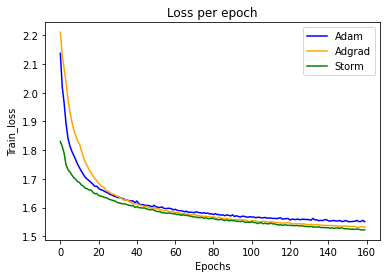

In [ ]:
plt.title("Loss per epoch")
plt.xlabel("Epochs")
plt.ylabel("Train_loss")
plt.plot(train_losses1,color="b",label="Adam")
plt.plot(train_losses2,color="orange",label="Adgrad")
plt.plot(train_losses3,color="g",label="Storm")
plt.legend()
plt.show()

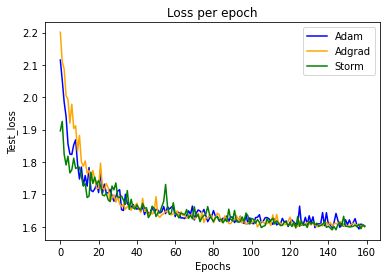

In [ ]:
plt.title("Loss per epoch")
plt.xlabel("Epochs")
plt.ylabel("Test_loss")
plt.plot(test_losses1,color="b",label="Adam")
plt.plot(test_losses2,color="orange",label="Adgrad")
plt.plot(test_losses3,color="g",label="Storm")
plt.legend()
plt.show()

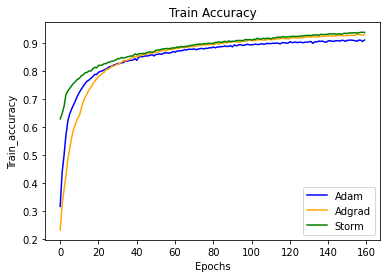

In [ ]:
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Train_accuracy")
plt.plot(train_accuracies1,color="b",label="Adam")
plt.plot(train_accuracies2,color="orange",label="Adgrad")
plt.plot(train_accuracies3,color="g",label="Storm")
plt.legend()
plt.show()

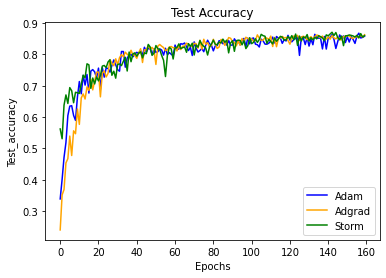

In [ ]:
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Test_accuracy")
plt.plot(test_accuracies1,color="b",label="Adam")
plt.plot(test_accuracies2,color="orange",label="Adgrad")
plt.plot(test_accuracies3,color="g",label="Storm")
plt.legend()
plt.show()